# Import Module

In [26]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
dates = range(23,30)

In [645]:
with open('./data_combined/df_topic_sent.pickle', 'rb') as handle:
    df_topic_sent = pickle.load(handle)
with open('./data_combined/df_topic_sent_news.pickle', 'rb') as handle:
    df_topic_sent_news = pickle.load(handle)

# Overall Visulization

In [278]:
df_topic_sent.iloc[:,5].sum(),df_topic_sent_news.iloc[:,5].sum()

(2611581, 2598169)

Text(0.5,0,'News')

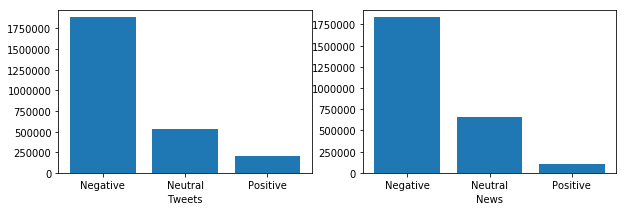

In [740]:
plt.figure(figsize=(10, 3))
plt.subplot('121')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent.iloc[:,1:4].sum())
plt.xlabel('Tweets')
plt.subplot('122')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent_news.iloc[:,1:4].sum())
plt.xlabel('News')

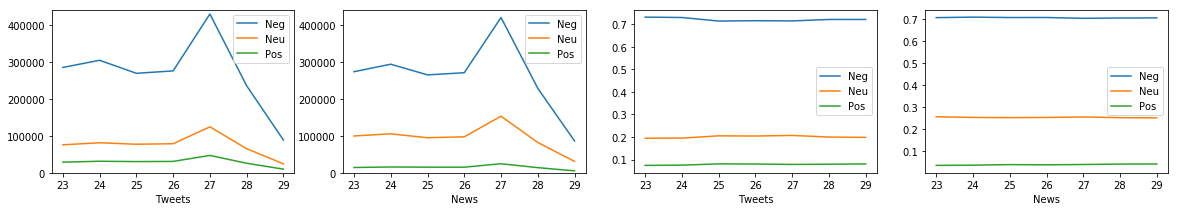

In [741]:
plt.figure(figsize=(20, 3))
plt.subplot('141')
plt.plot(df_topic_sent.groupby('day').sum().iloc[:,1:4])
plt.ylim(0,440000)
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('142')
plt.plot(df_topic_sent_news.groupby('day').sum().iloc[:,1:4])
plt.ylim(0,440000)
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('143')
day = df_topic_sent.groupby('day').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('144')
day = df_topic_sent_news.groupby('day').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])

In [743]:
for df in [df_topic_sent,df_topic_sent_news]:
    t = df.iloc[:,1:4].sum()
    print((t[2]-t[0])/(t.sum()))

-0.6431066086022221
-0.6654151442804529


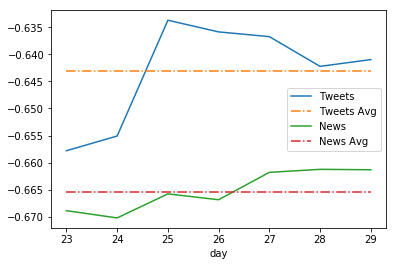

In [756]:
# Overall all sentiment score against each day
tweets_sent = df_topic_sent.groupby('day').sum()
((tweets_sent[2]-tweets_sent[0])/tweets_sent['total']).plot()
plt.plot(dates,[-0.6431066086022221 for d in dates], linestyle="-." )
news_sent = df_topic_sent_news.groupby('day').sum()
((news_sent[2]-news_sent[0])/news_sent['total']).plot()
plt.plot(dates,[-0.6654151442804529 for d in dates], linestyle="-." )
plt.legend(['Tweets','Tweets Avg','News','News Avg'])

# Topic Count of each Sentiment

Text(0.5,0,'News')

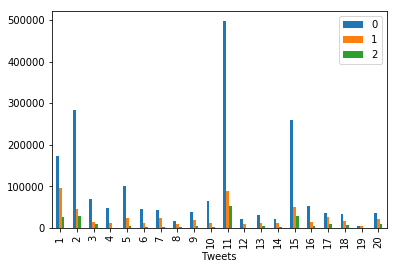

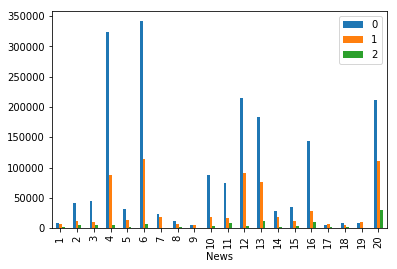

In [757]:
#由于存在无法map topics 和 sent的，所以现在tweets和new数量不一致
plt.figure(figsize=(10, 3))
df_topic_sent.groupby('TopicID').sum().iloc[:,:3].plot.bar()
plt.xlabel('Tweets')
df_topic_sent_news.groupby('TopicID').sum().iloc[:,:3].plot.bar()
plt.xlabel('News')

In [686]:
def multi_subplot(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(3):
        plt.subplot(f'14{i+1}')
        count = dfs.groupby('TopicID')[i].sum()
        if d=='bar':
            count.plot.bar()
        elif d=='pie':
            count.sort_index().plot.pie()
    #     plt.legend(loc='best', shadow=True)
        plt.title('Topics Count when sentiment is '+ str(i))
    plt.subplot(f'144')
    topic_total = dfs.groupby('TopicID').sum()
    ((topic_total[2]-topic_total[0])/topic_total['total']).plot.bar()
#     dfs.groupby('TopicID')['TopicScore'].sum().plot.bar()
    plt.title('Topics Sentiment Scores')

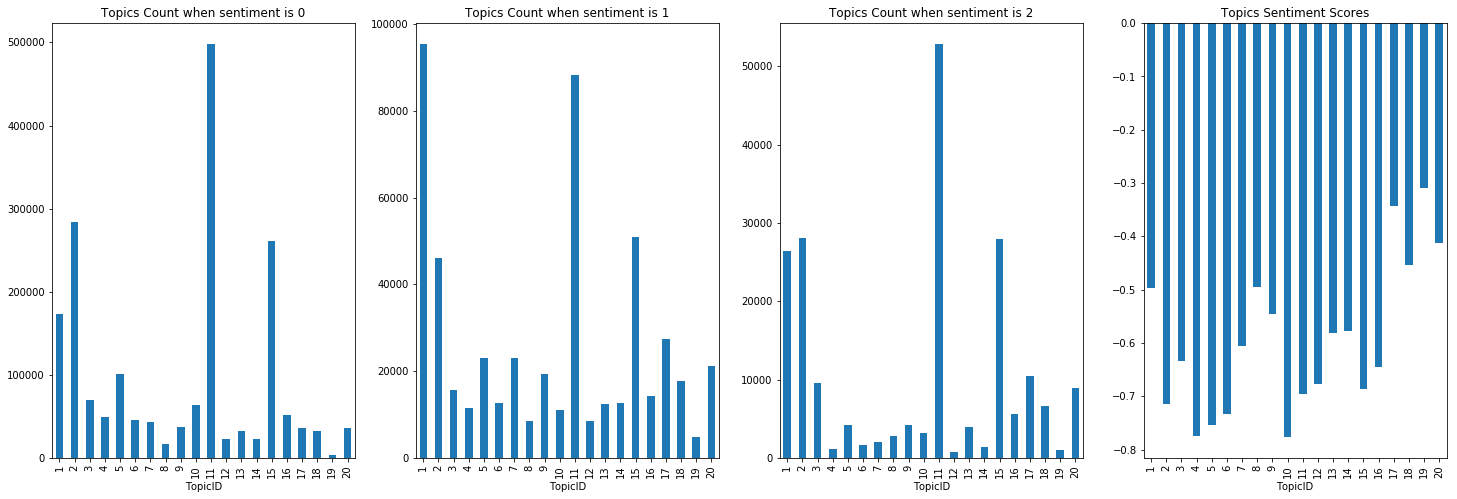

In [687]:
multi_subplot(w=25,h=8,dfs=df_topic_sent)

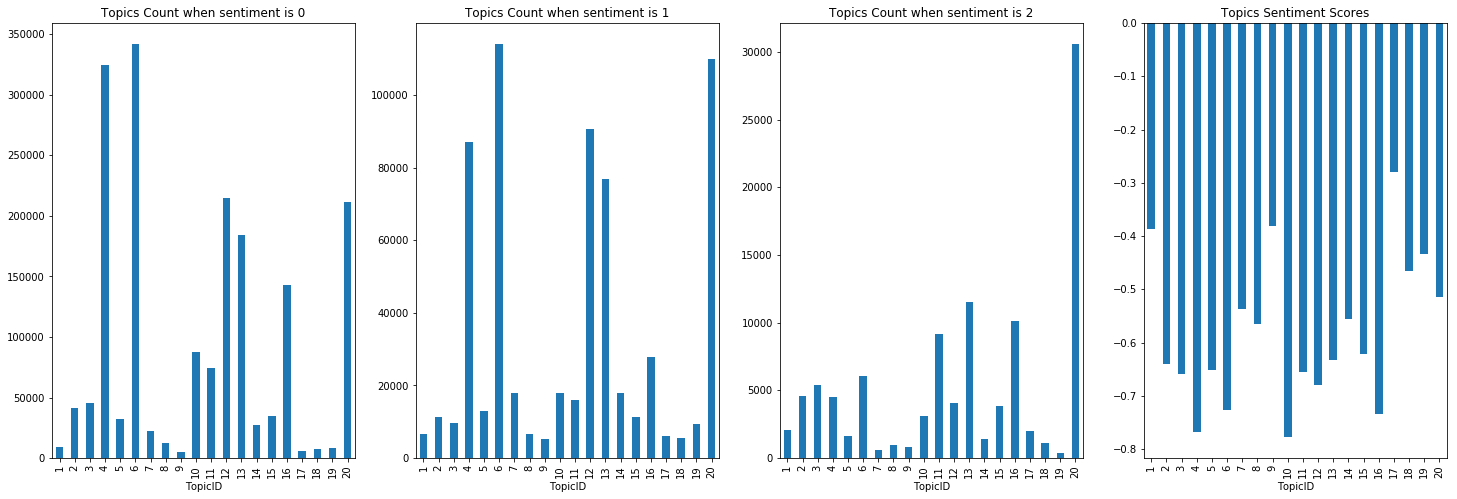

In [286]:
multi_subplot(w=25,h=8,dfs=df_topic_sent_news)

In [27]:
def multi_subplot20(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(7):
        for j in range(3):
            plt.subplot2grid((7,3), (i,j))
            count = dfs[dfs.day==dates[i]][j]
            if d=='bar':
                pic=count.plot.bar()
                plt.xticks(range(20),range(1,21))
            elif d=='pie':
                pic=count.sort_index().plot.pie(labels=range(1,21))
#                 plt.legend(range(1,21))
#             pic.set_ylim(0,120000)
            plt.title('Topics Count when sentiment is '+ str(j))
            plt.ylabel(f'Day {i+1}')

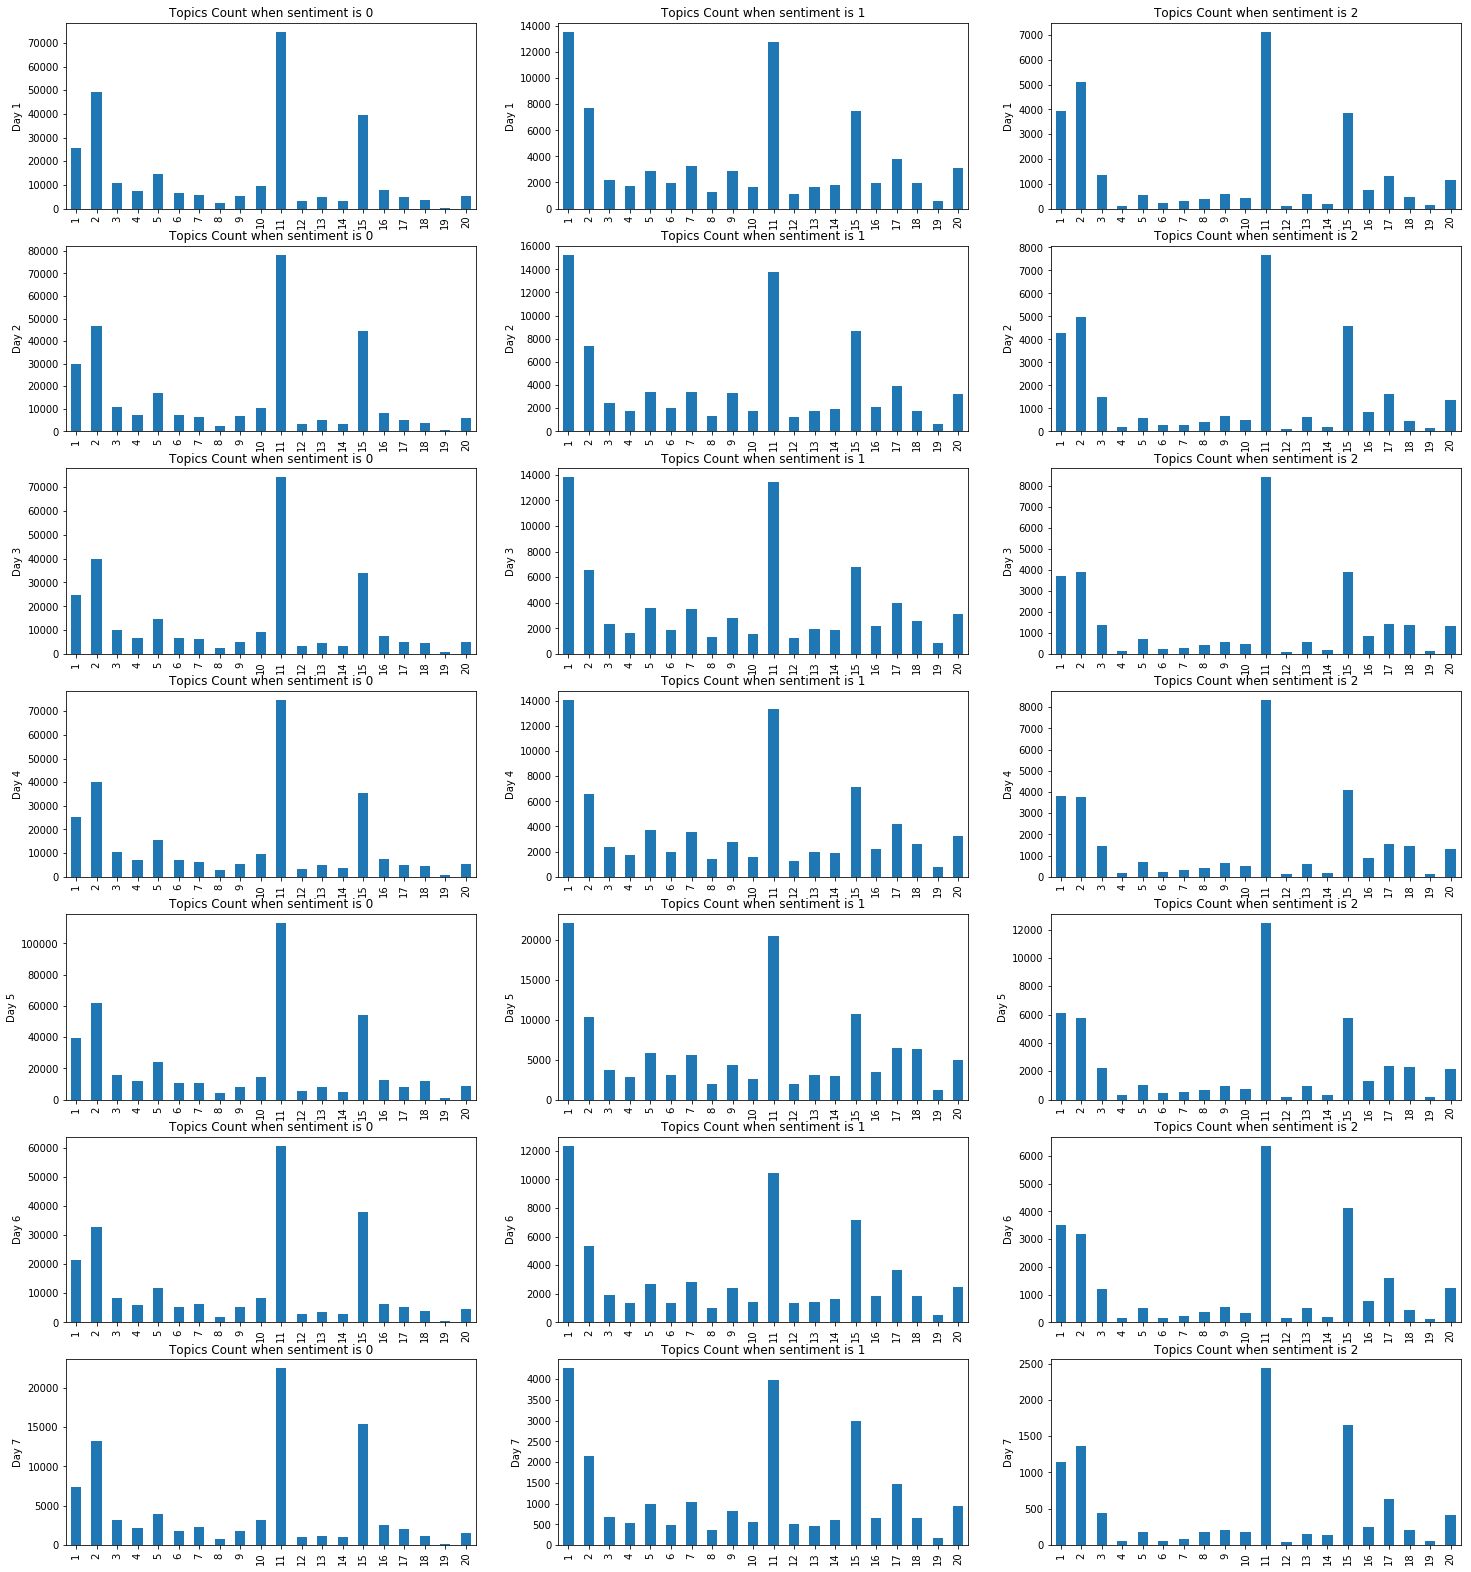

In [28]:
multi_subplot20(w=25,h=28,dfs=df_topic_sent)

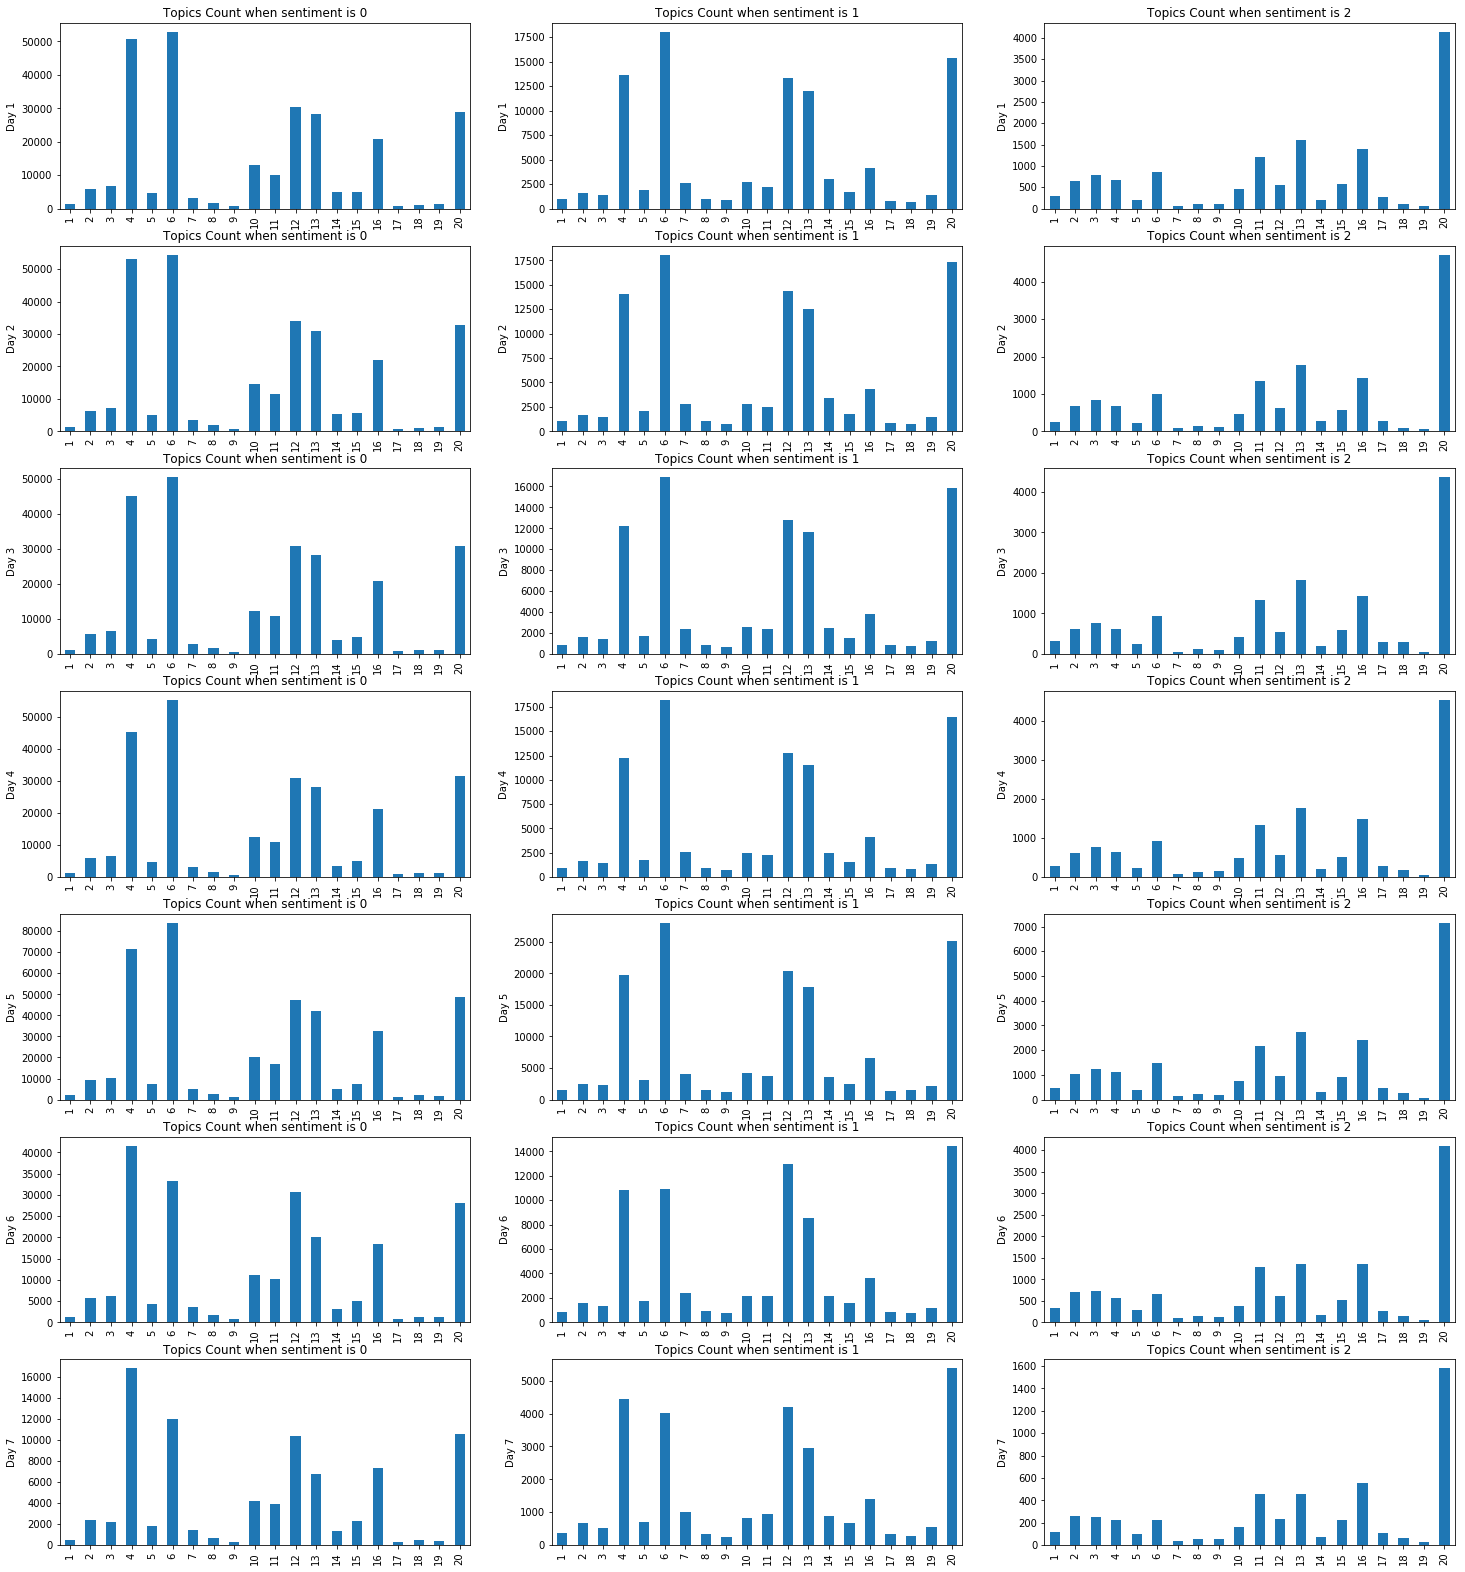

In [29]:
multi_subplot20(w=25,h=28,dfs=df_topic_sent_news)

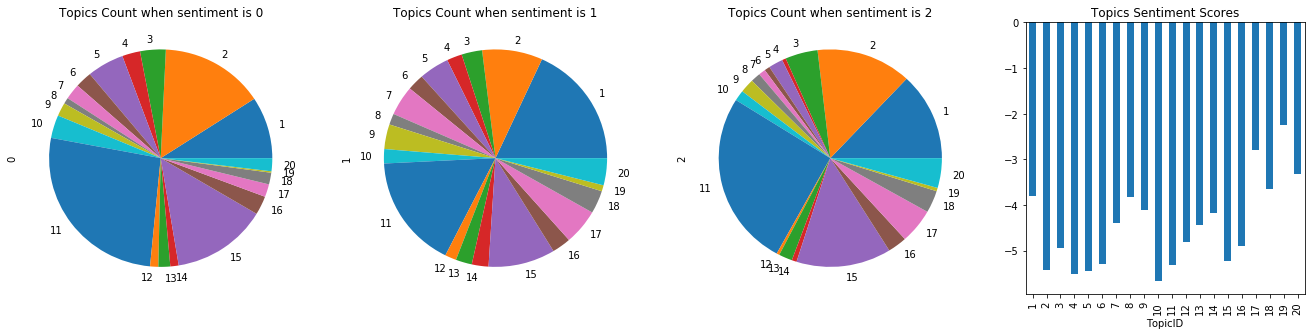

In [34]:
multi_subplot(w=23,h=5,d='pie')

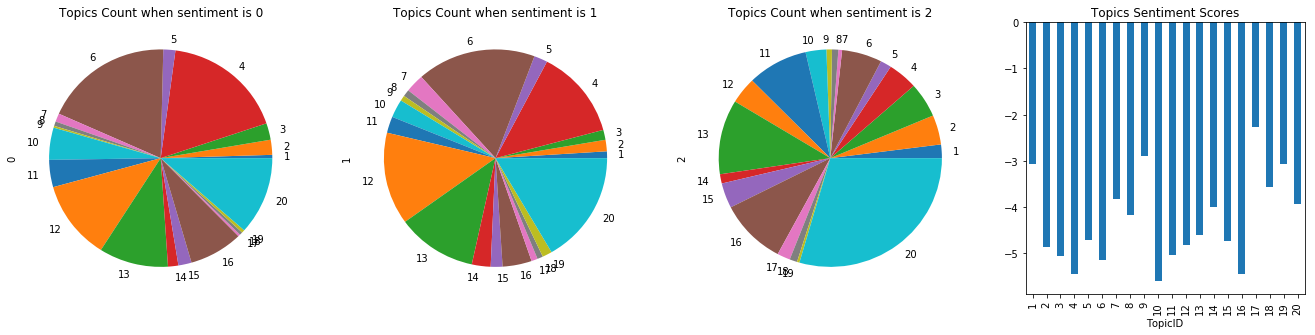

In [35]:
multi_subplot(w=23,h=5,d='pie',dfs=df_topic_sent_news)

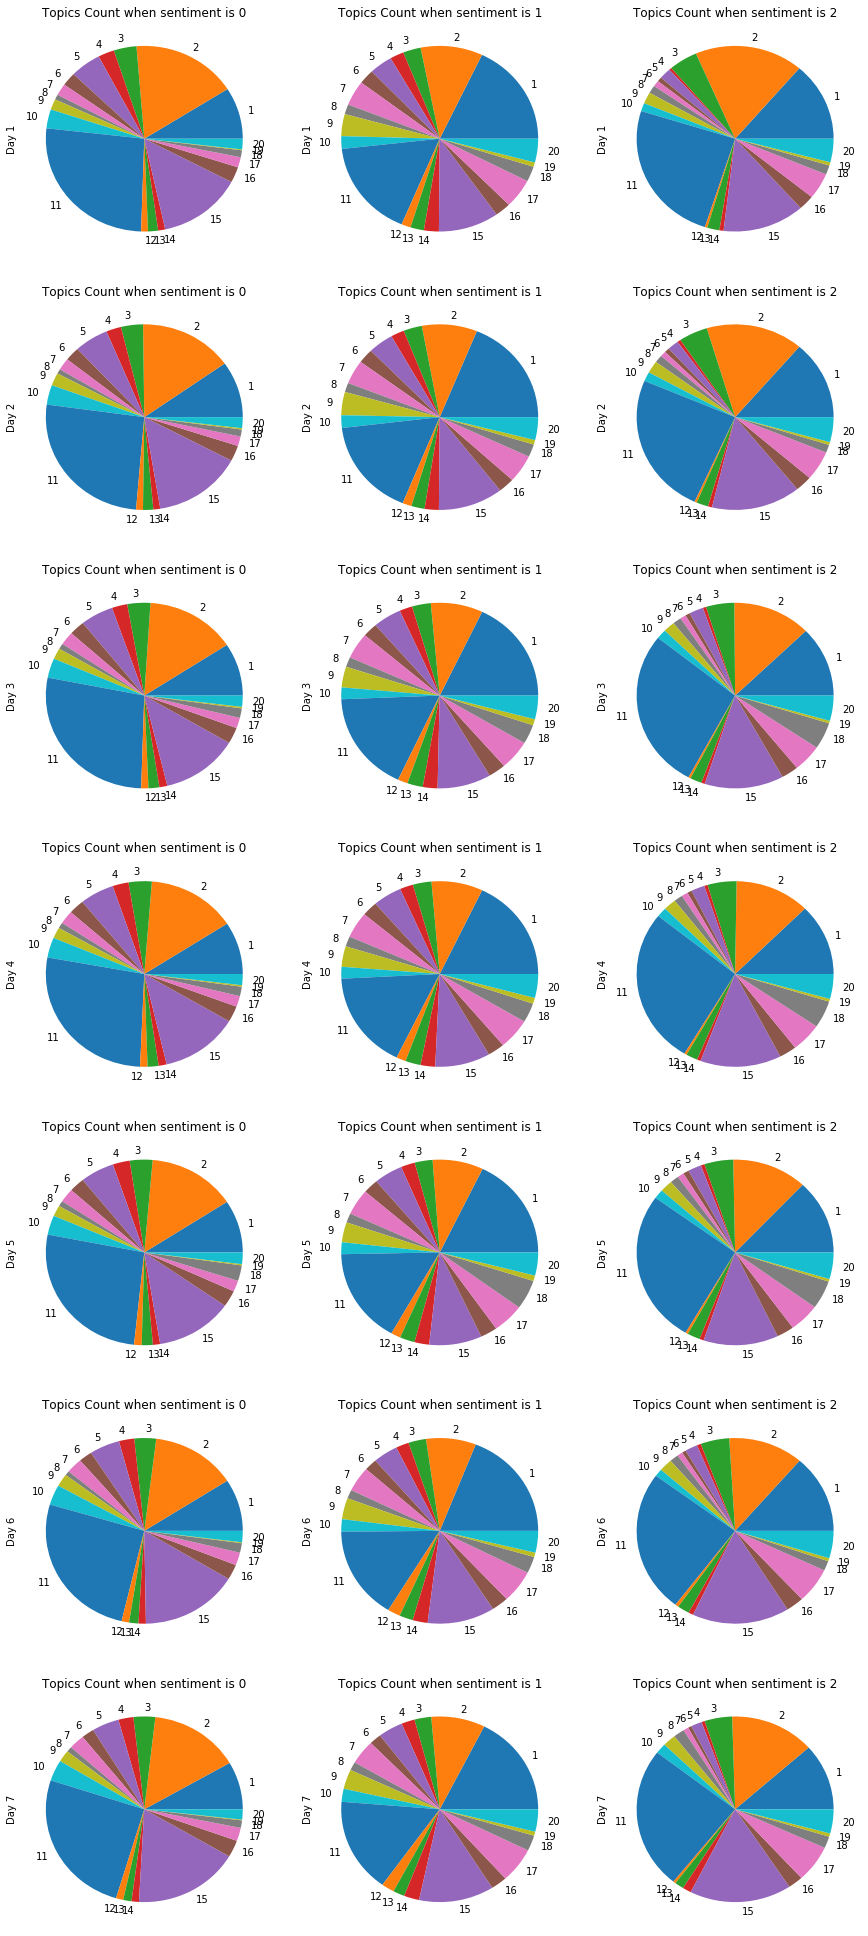

In [36]:
multi_subplot20(w=15,h=35,d='pie',dfs=df_topic_sent)

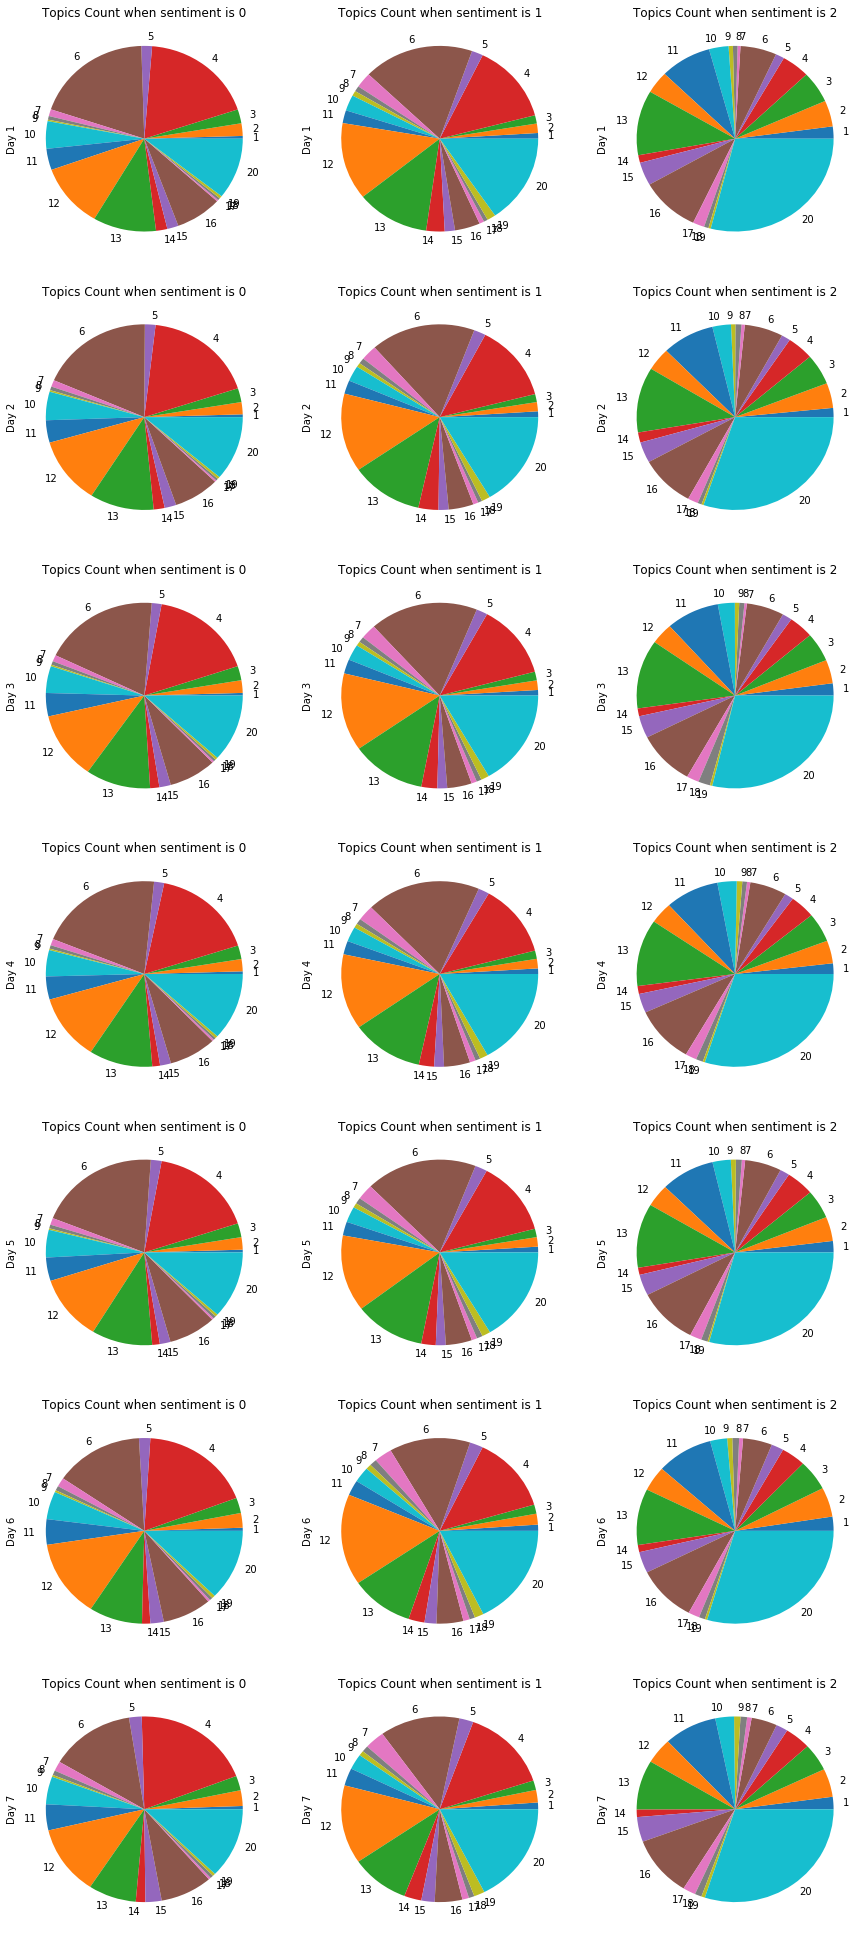

In [37]:
multi_subplot20(w=15,h=35,d='pie',dfs=df_topic_sent_news)

# Data Reduction & Relative Value

In [622]:
df_topic_sent.head(3) # Flat table

TopicID      0      1     2  day  total  TopicScore
0        1  25522  13546  3934   23  43002   -0.502023
1        2  49142   7687  5114   23  61943   -0.710782
2        3  10637   2200  1354   23  14191   -0.654147

In [623]:
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(pd.concat([x[0],x[1],x[2]],axis=1).values))),index=dates).head(3)

1                    2                    3   \
23  [25522, 13546, 3934]  [49142, 7687, 5114]  [10637, 2200, 1354]   
24  [29770, 15277, 4272]  [46721, 7350, 4973]  [11008, 2475, 1477]   
25  [24661, 13805, 3715]  [39752, 6577, 3896]  [10156, 2383, 1409]   

                   4                   5                  6   \
23  [7559, 1723, 121]  [14494, 2878, 553]  [6636, 1923, 220]   
24  [7462, 1776, 174]  [17026, 3377, 576]  [7377, 2052, 254]   
25  [6816, 1625, 160]  [14547, 3590, 704]  [6831, 1873, 234]   

                   7                  8                  9   \
23  [5830, 3273, 303]  [2513, 1297, 389]  [5294, 2896, 574]   
24  [6323, 3368, 292]  [2425, 1311, 410]  [6763, 3275, 667]   
25  [6263, 3486, 290]  [2614, 1320, 423]  [5133, 2788, 582]   

                    10                    11                 12  \
23   [9400, 1662, 410]  [74662, 12778, 7133]  [3186, 1151, 113]   
24  [10345, 1785, 504]  [78394, 13777, 7684]  [3414, 1204, 113]   
25   [9112, 1574, 498]  [74061, 13424, 8427]  [3191, 1255, 112]   

                   13                 14                   15  \
23  [4735, 1676, 577]  [3262, 1845, 196]  [39430, 7501, 3865]   
24  [5136, 1774, 606]  [3401, 1887, 204]  [44507, 8637, 4571]   
25  [4788, 1968, 582]  [3486, 1865, 173]  [34173, 6792, 3935]   

                   16                  17                  18  \
23  [7739, 1958, 748]  [5082, 3824, 1301]   [3419, 1995, 464]   
24  [8269, 2144, 862]  [5072, 3932, 1602]   [3652, 1787, 431]   
25  [7562, 2209, 848]  [4872, 3956, 1435]  [4453, 2578, 1402]   

                 19                  20  
23  [439, 592, 164]  [5236, 3103, 1173]  
24  [740, 648, 153]  [5759, 3221, 1354]  
25  [728, 828, 136]  [5207, 3164, 1328]

In [303]:
#每天的每个sentiment 的所有topic 之和
df_topic_sent.groupby('day').sum().iloc[:,1:4]

0       1      2
day                       
23   284217   75508  28706
24   303564   81057  31179
25   268406   77060  30289
26   274949   78423  30721
27   428429  123977  46859
28   234886   64988  25758
29    88452   24287   9866

In [361]:
#每天的每个topic 的三种sentiment之和
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['total']))),index=dates)

1      2      3      4      5      6      7     8      9      10  \
23  43002  61943  14191   9403  17925   8779   9406  4199   8764  11472   
24  49319  59044  14960   9412  20979   9683   9983  4146  10705  12634   
25  42181  50225  13948   8601  18841   8938  10039  4357   8503  11184   
26  42948  50659  14336   9134  19870   9329  10259  4567   8698  11733   
27  67440  78132  21912  15088  30866  14373  16437  6773  13400  17689   
28  37206  41338  11503   7460  14820   6697   9254  3165   8140   9969   
29  12761  16686   4271   2765   5118   2365   3403  1338   2844   3948   

        11    12     13    14     15     16     17     18    19     20  
23   94573  4450   6988  5303  50796  10445  10207   5878  1195   9512  
24   99855  4731   7516  5492  57715  11275  10606   5870  1541  10334  
25   95912  4558   7338  5524  44900  10619  10263   8433  1692   9699  
26   96365  4699   7528  5681  46506  10718  10874   8626  1682   9881  
27  146169  7481  11830  8362  70879  16990  17067  20226  2345  15806  
28   77618  4401   5534  4658  49082   8789  10496   6189  1000   8313  
29   28895  1604   1819  1821  20044   3484   4149   2012   349   2929

In [397]:
# 每个topic的每种sentiment一周之和
df_topic_sent.groupby('TopicID').sum().iloc[:,:3].T

TopicID      1       2      3      4       5      6      7      8      9   \
0        172956  283922  69874  49107  101116  45770  43631  17019  37527   
1         95417   46020  15660  11616   23059  12779  23124   8649  19317   
2         26484   28085   9587   1140    4244   1615   2026   2877   4210   

TopicID     10      11     12     13     14      15     16     17     18  \
0        64286  498257  22447  32210  22723  261003  52267  35697  32678   
1        11153   88256   8646  12359  12684   50941  14389  27509  17860   
2         3190   52874    831   3984   1434   27978   5664  10456   6696   

TopicID    19     20  
0        4049  36364  
1        4744  21118  
2        1011   8992

In [660]:
def getRatio(df_topic_sent):
    sent_day,sent_topic = {},{}
    for sent in range(3):
        sent_day[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=dates).T
        for d in dates:
            sent_day[sent][d] = sent_day[sent][d]/df_topic_sent.groupby('day').sum().iloc[:,1:4][sent][d] 
                                                #在当天所有相同sentiment 下的和（aggregate topic）
        sent_topic[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=dates)
        for t in range(1,21):
            sent_topic[sent][t] = sent_topic[sent][t]/df_topic_sent.groupby('TopicID').sum().iloc[:,sent][t] 
                                        #在一周所有相同sentiment下的和(aggregate day)
    return sent_day,sent_topic

In [670]:
def ratioSent(df_topic_sent):
    sent_day,sent_topic = getRatio(df_topic_sent)
    plt.figure(figsize=(22, 14))
    for sent in range(3):
        plt.subplot(f'23{sent+1}')
        plt.plot(sent_day[sent].T)
        plt.ylim(0,0.32)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same day)') # 每个日期上的点和为1
        plt.subplot(f'23{sent+4}')
        plt.plot(sent_topic[sent])
        plt.ylim(0,0.36)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same topic)')#每条topic线条和为1

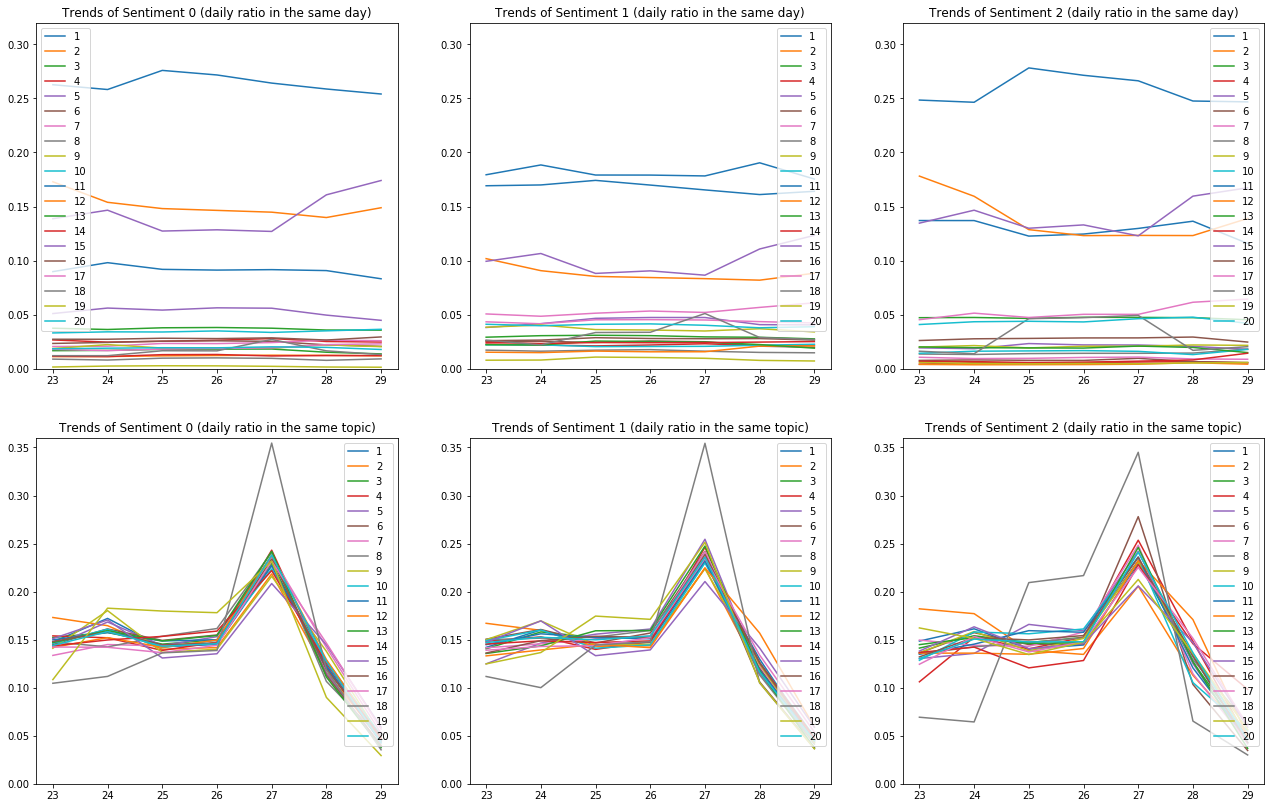

In [671]:
ratioSent(df_topic_sent)

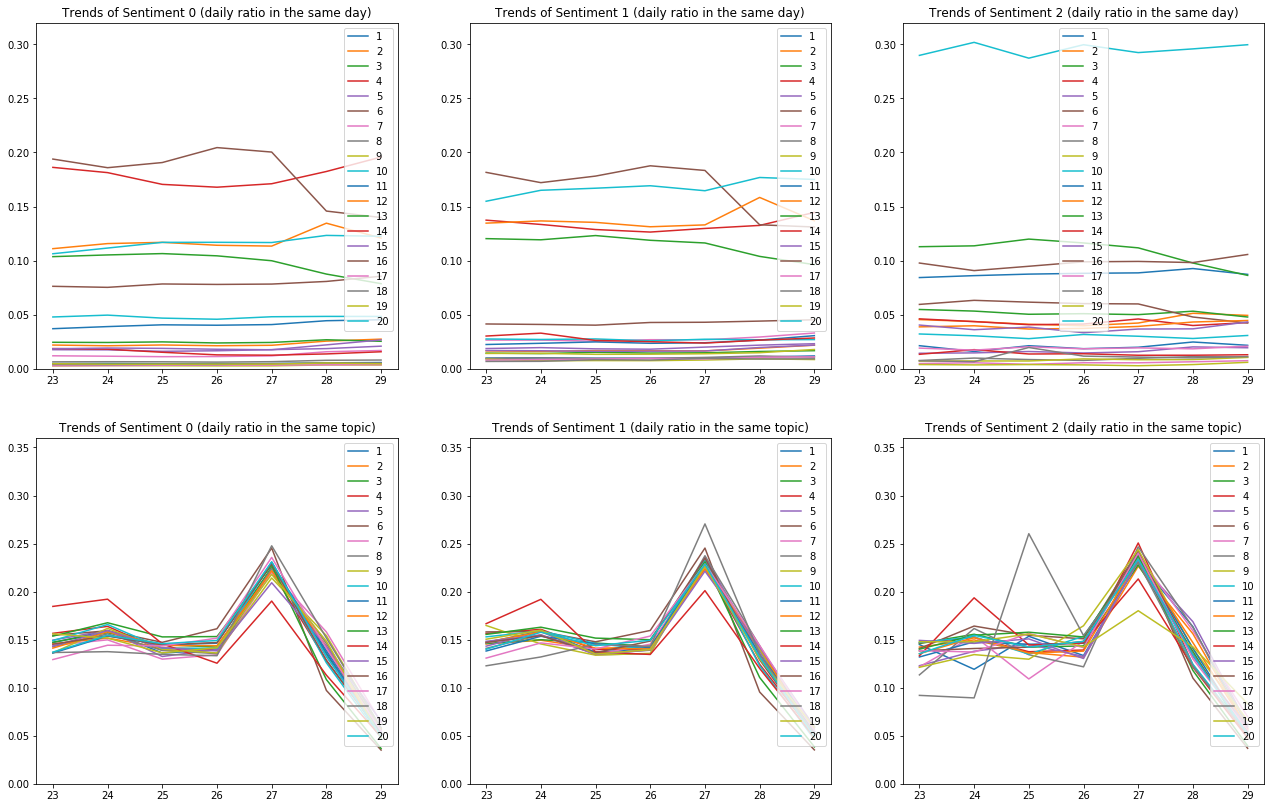

In [672]:
ratioSent(df_topic_sent_news)

In [733]:
def multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=0):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
            for sent in range(3):
                if ratio==0:
                    getRatio(dfs)[ratio][sent].loc[t,:].plot(ylim=(0,0.28))
                else:
                    getRatio(dfs)[ratio][sent].T.loc[t,:].plot(ylim=(0,0.36))
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.title('Sentiment Ratio of Topic '+ str(t))
            t += 1

In [520]:
def topicDailySent(dfs=df_topic_sent):
    plt.figure(figsize=(25, 7))
    for i in range(3):
        sents = dict(dfs.groupby('TopicID').apply(lambda x: list(x[i])))
        count = pd.DataFrame(sents)
        plt.subplot(f'14{i+1}')
        plt.plot(count)
        plt.xticks(range(7),range(23,30),rotation=0)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Sentiment {i} Count against date of each topcis')
    plt.subplot('144')
    plt.plot(pd.DataFrame(dict(dfs.groupby('TopicID').apply(lambda x: list(x['TopicScore'])))))
    plt.ylim(-0.85,-0.2)
    plt.xticks(range(7),range(23,30),rotation=0)
    plt.legend(range(1,21),loc='best')
    plt.title('Sentiment Score against date of each topcis')

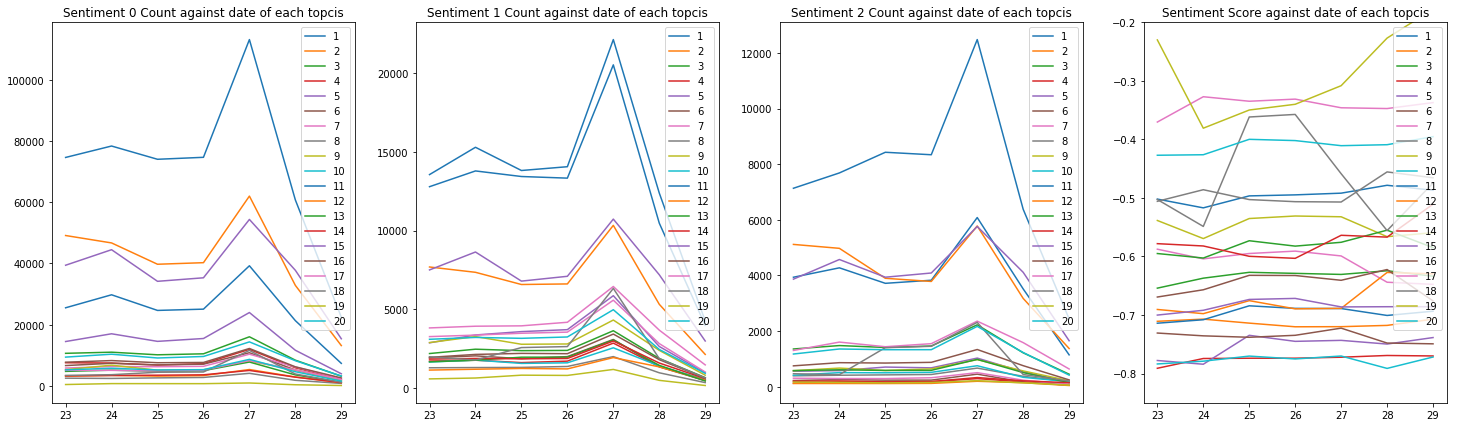

In [521]:
topicDailySent(df_topic_sent)

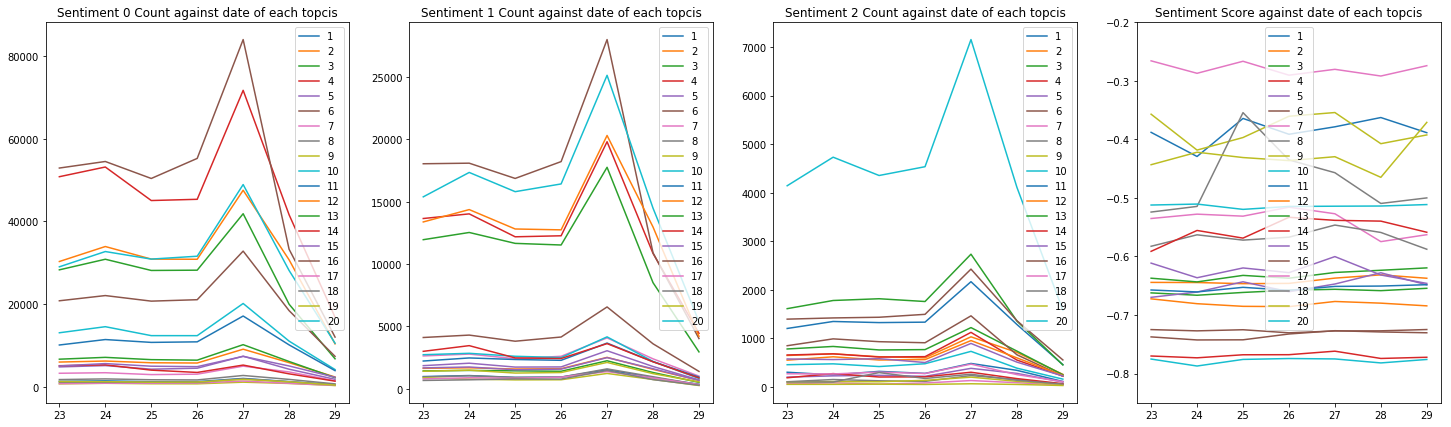

In [522]:
topicDailySent(df_topic_sent_news)

# Sentiment trends against each topic

In [696]:
def multi_subplot_sent(w=15,h=12,dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            for s in range(3):
                pic= pd.Series(dfs.groupby('TopicID').apply(lambda x: list(x[s]))[t]).plot()
#                 pic.set_ylim([0,90000])
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.xticks(range(7),range(23,30),rotation=0)
            plt.title('Sentiment Trend of Topic '+ str(t))
            t += 1

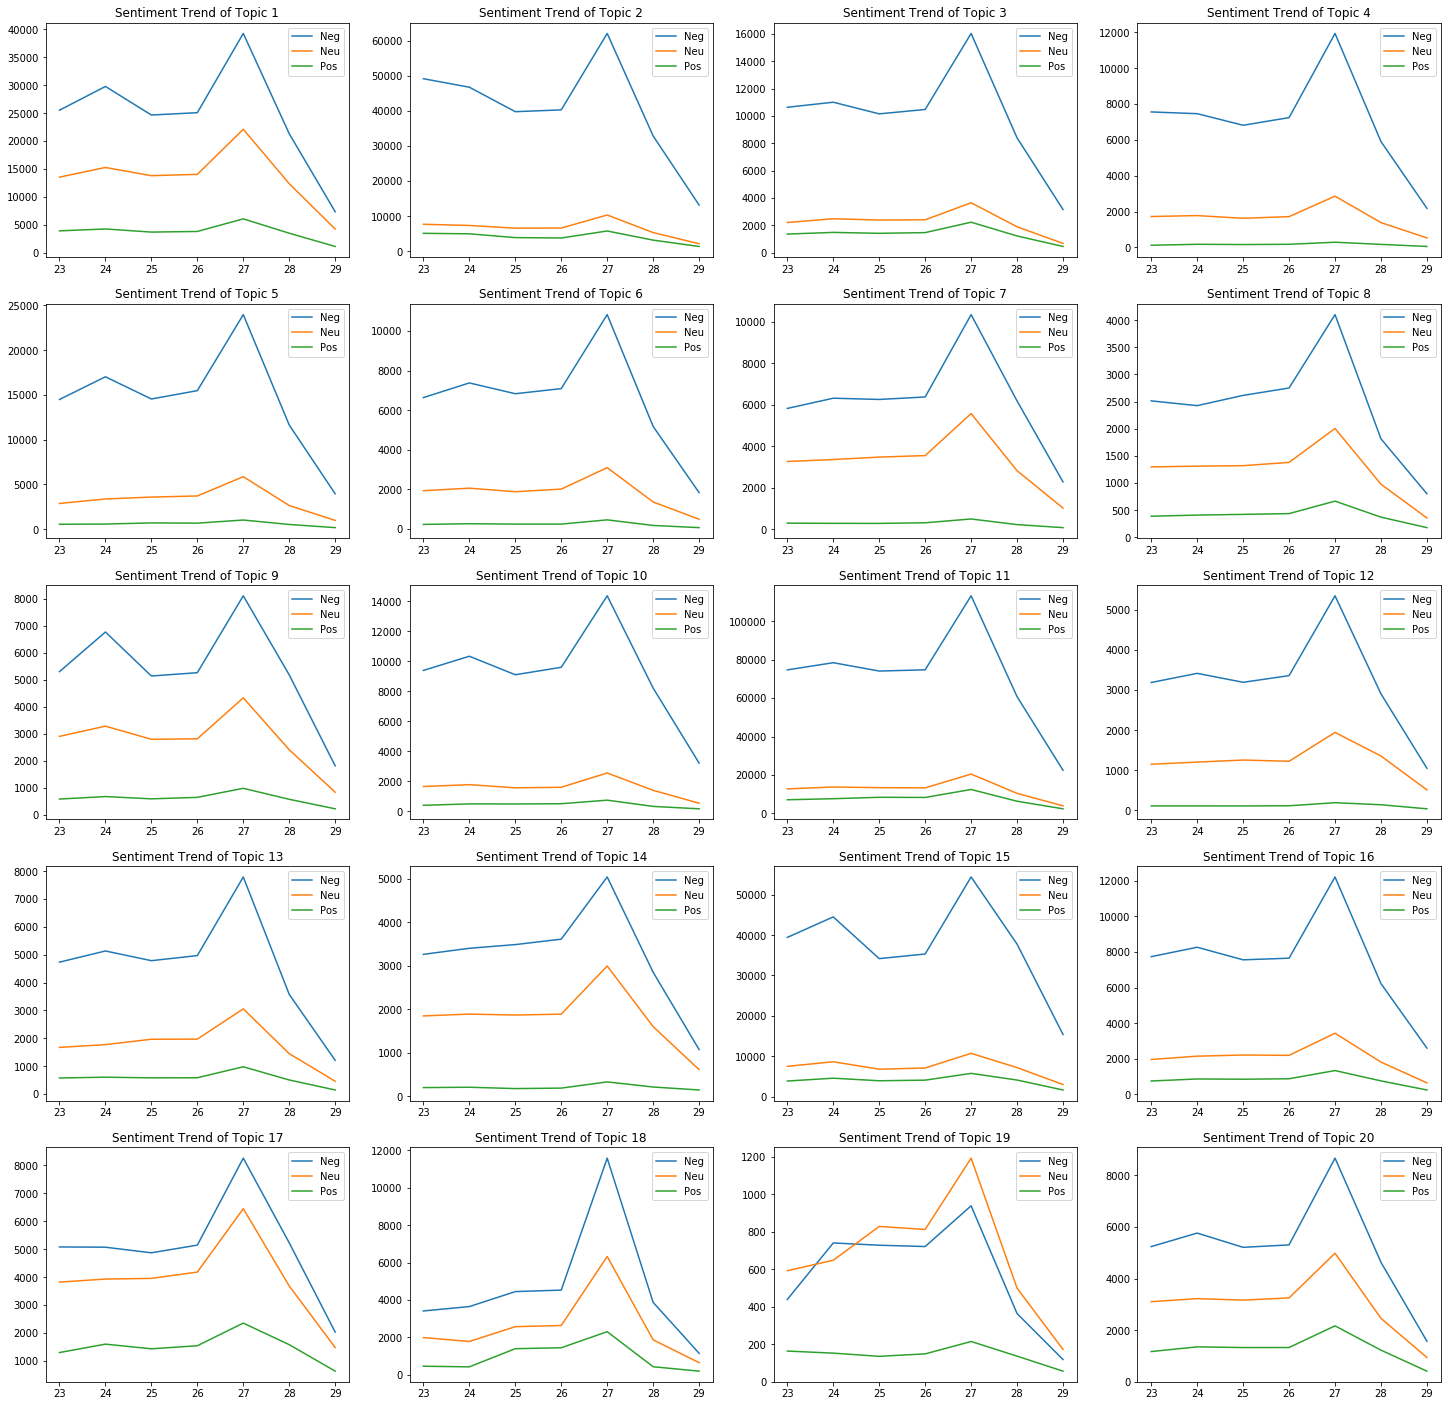

In [697]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent)

## Relative value: Base on Topics
For each sentiment in each day, all the values of each topics add up to 1

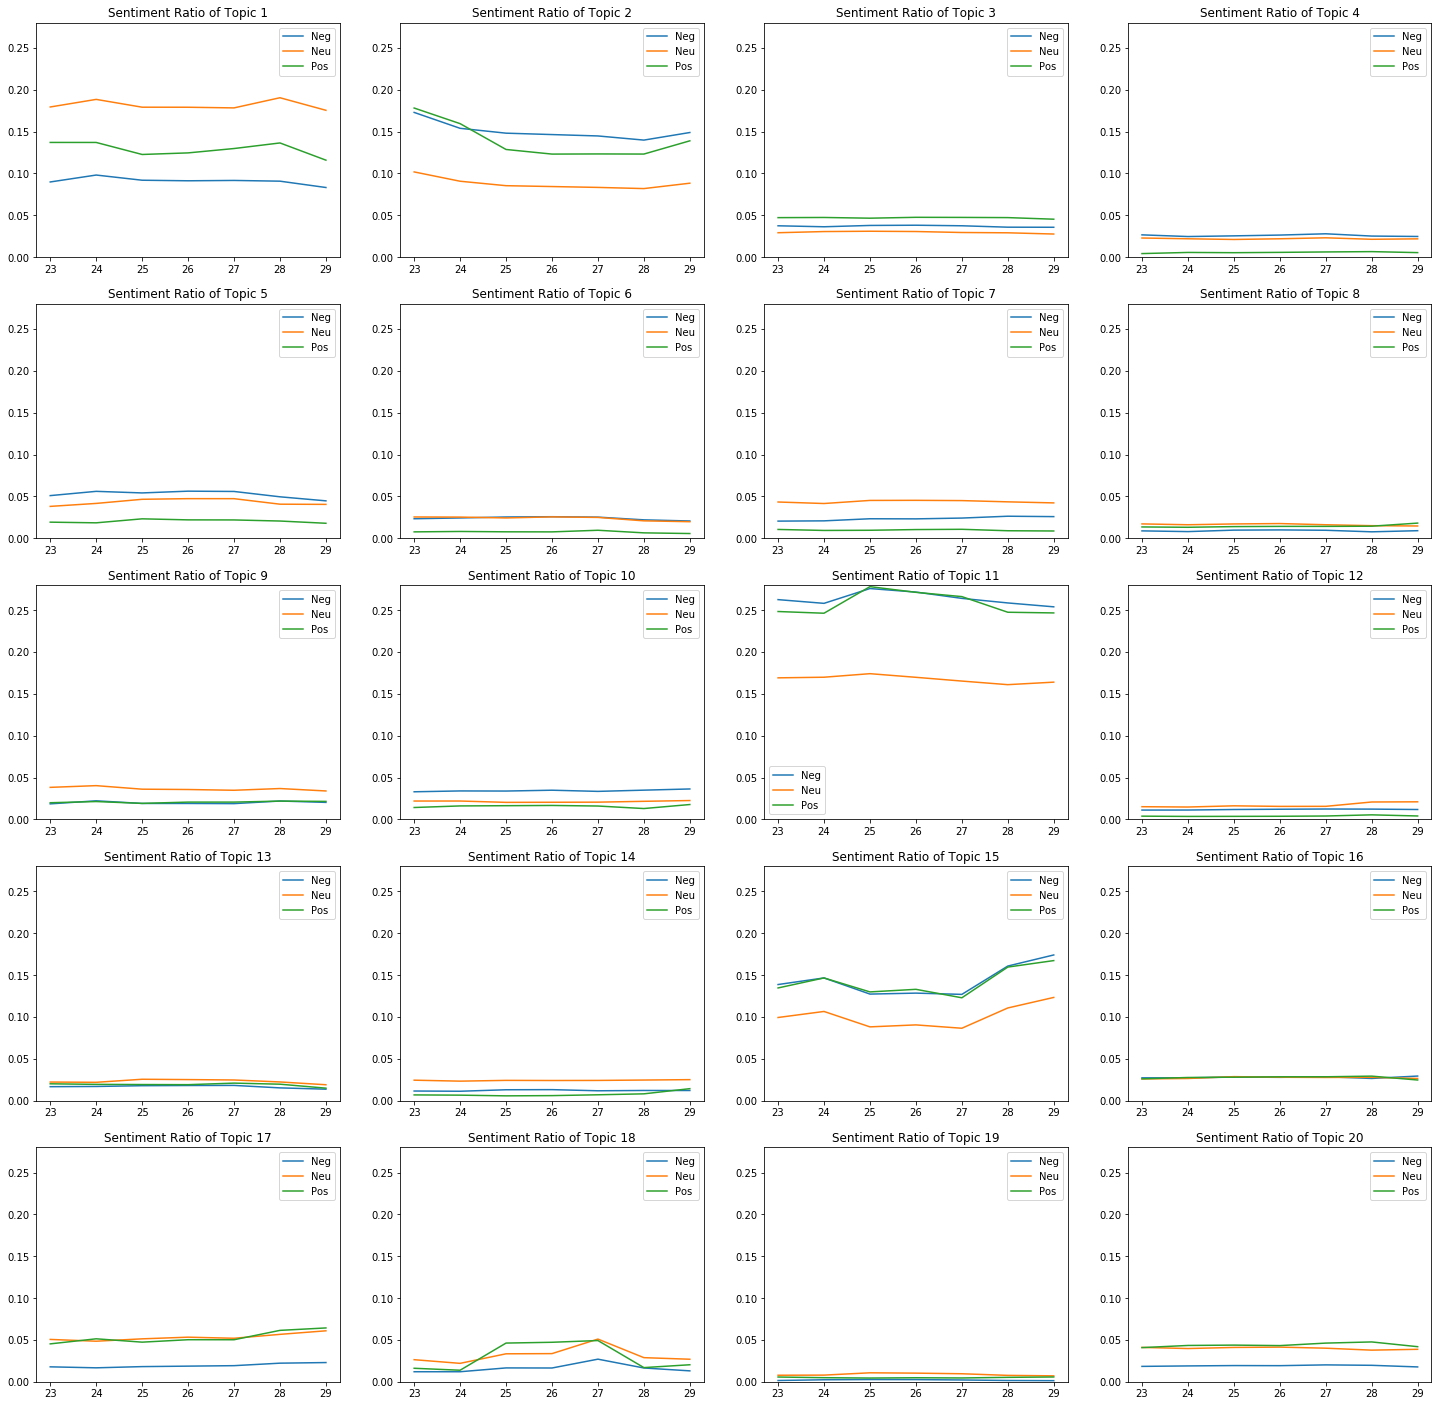

In [713]:
multi_subplot_sentRatio(dfs = df_topic_sent)

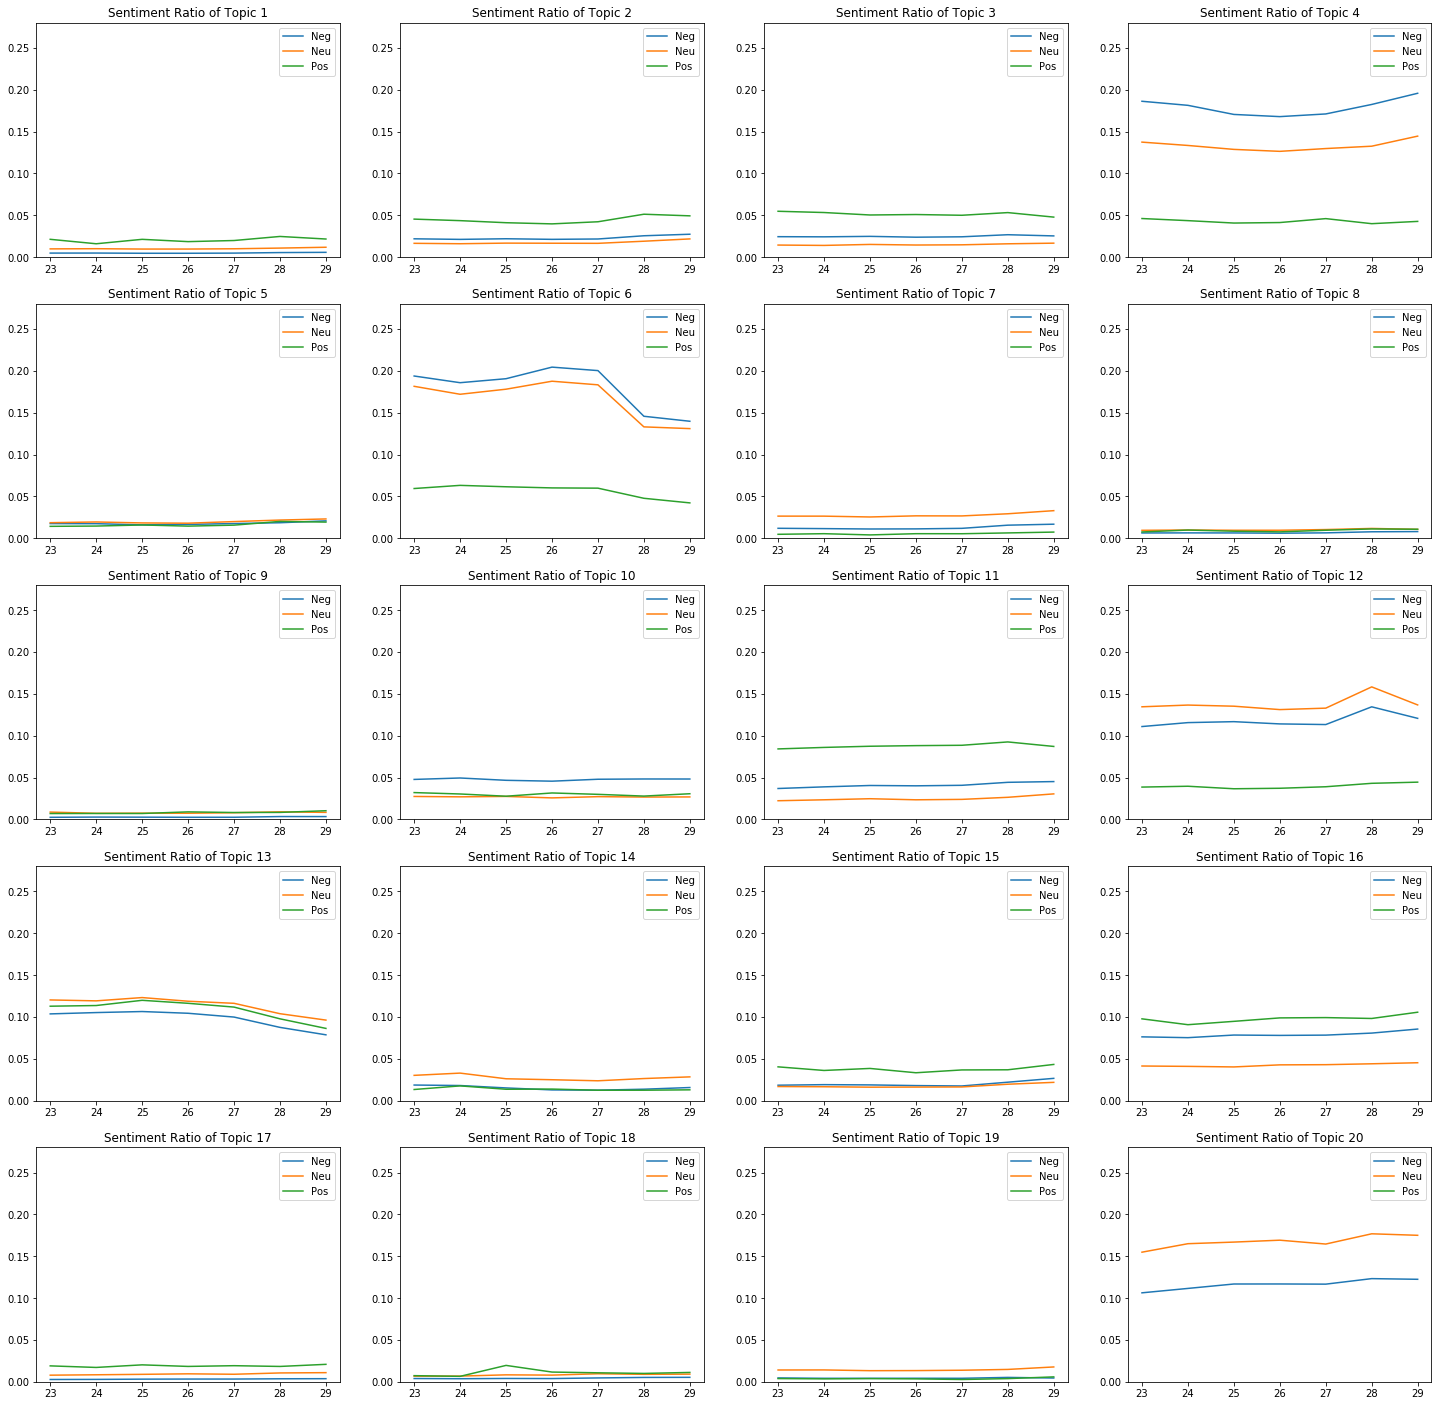

In [714]:
multi_subplot_sentRatio(dfs = df_topic_sent_news)

## Relative values: Base on date
For each sentiment in each topic, all the one-week value add up to 1

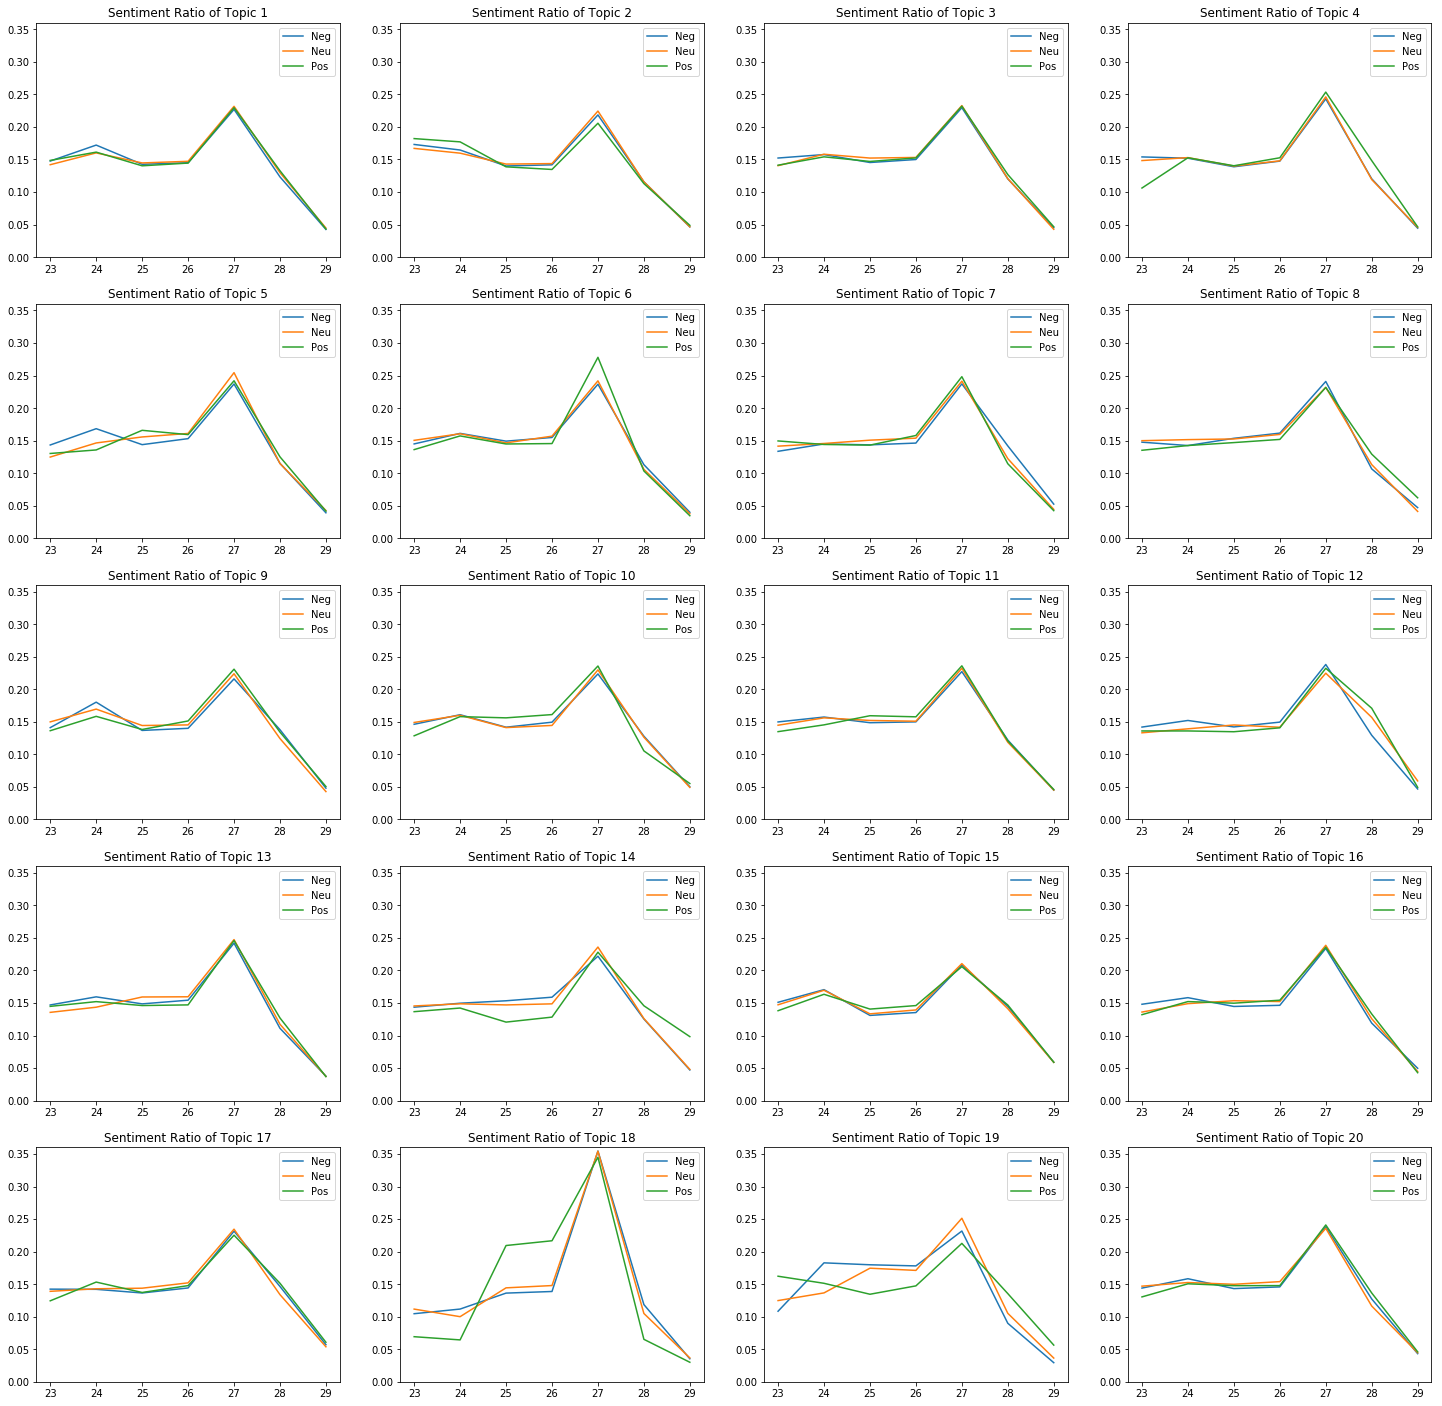

In [736]:
multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=1)

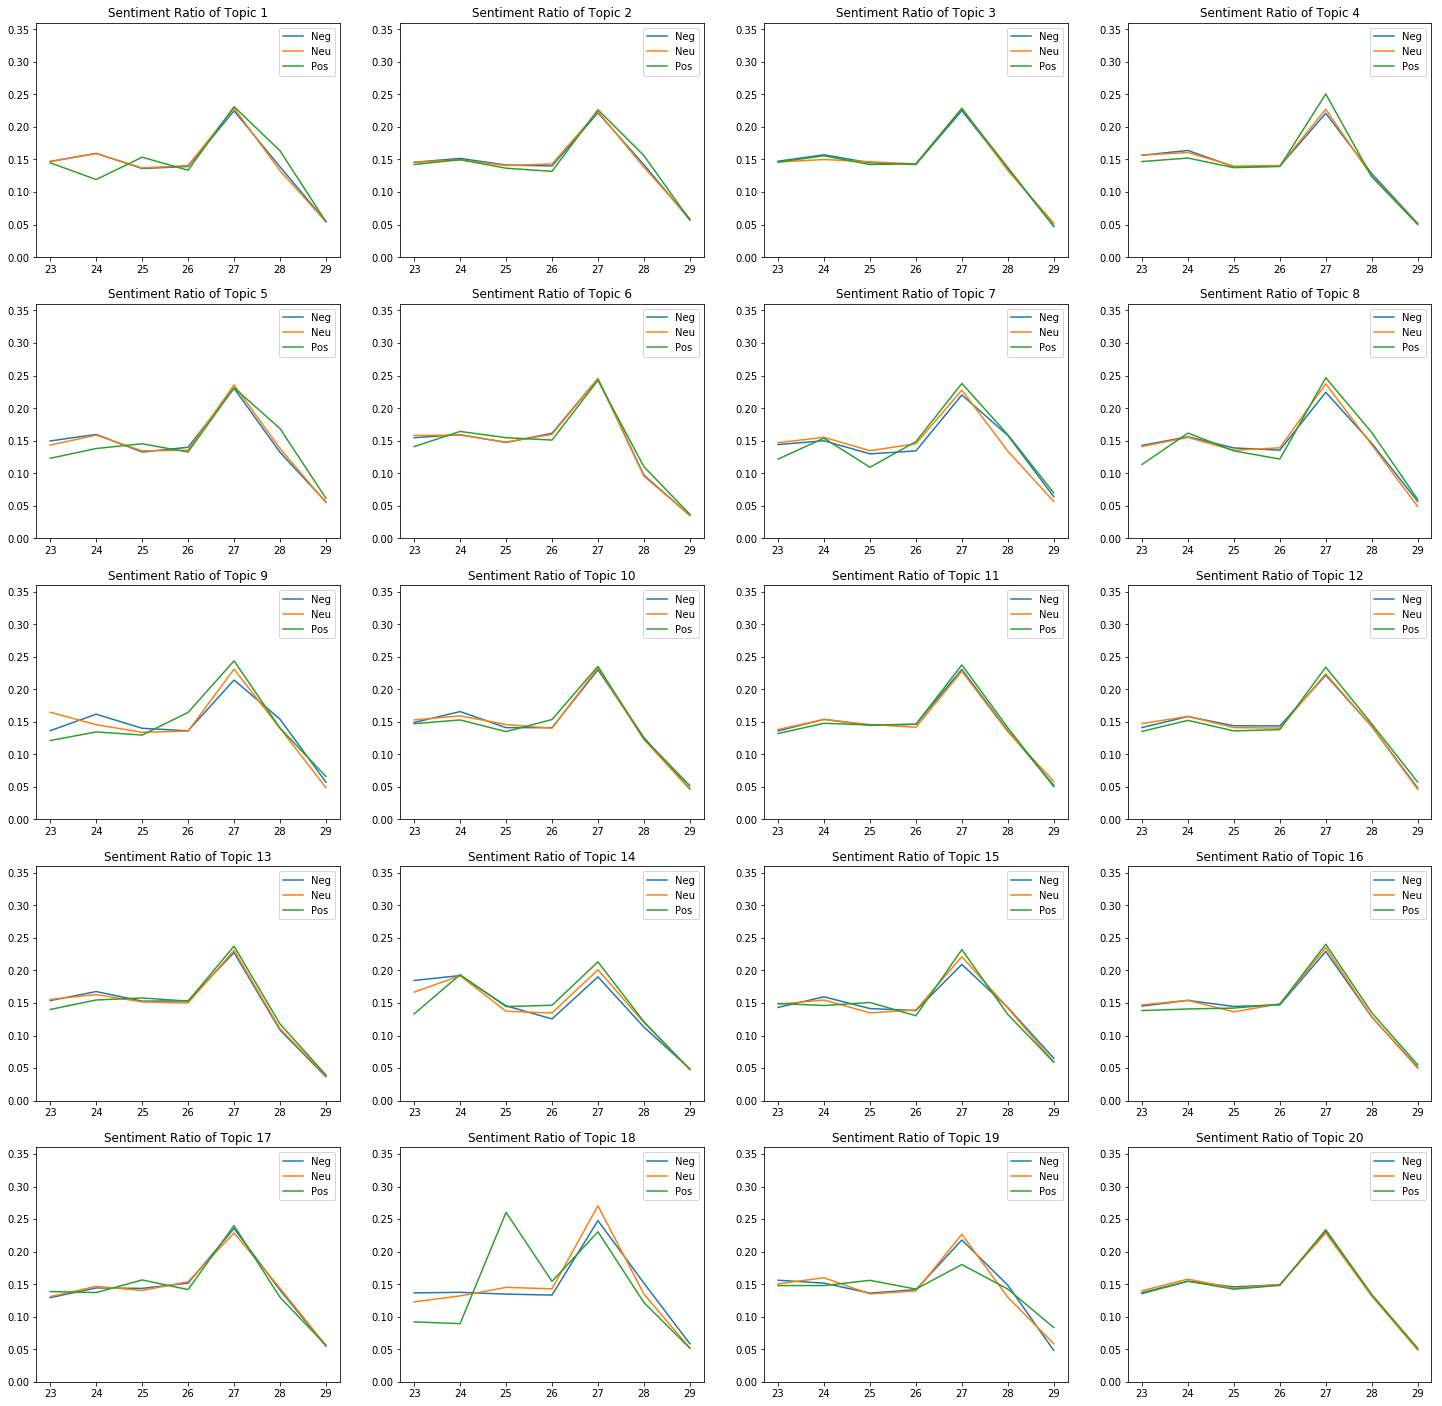

In [737]:
multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent_news,ratio=1)

## Sentiment Score

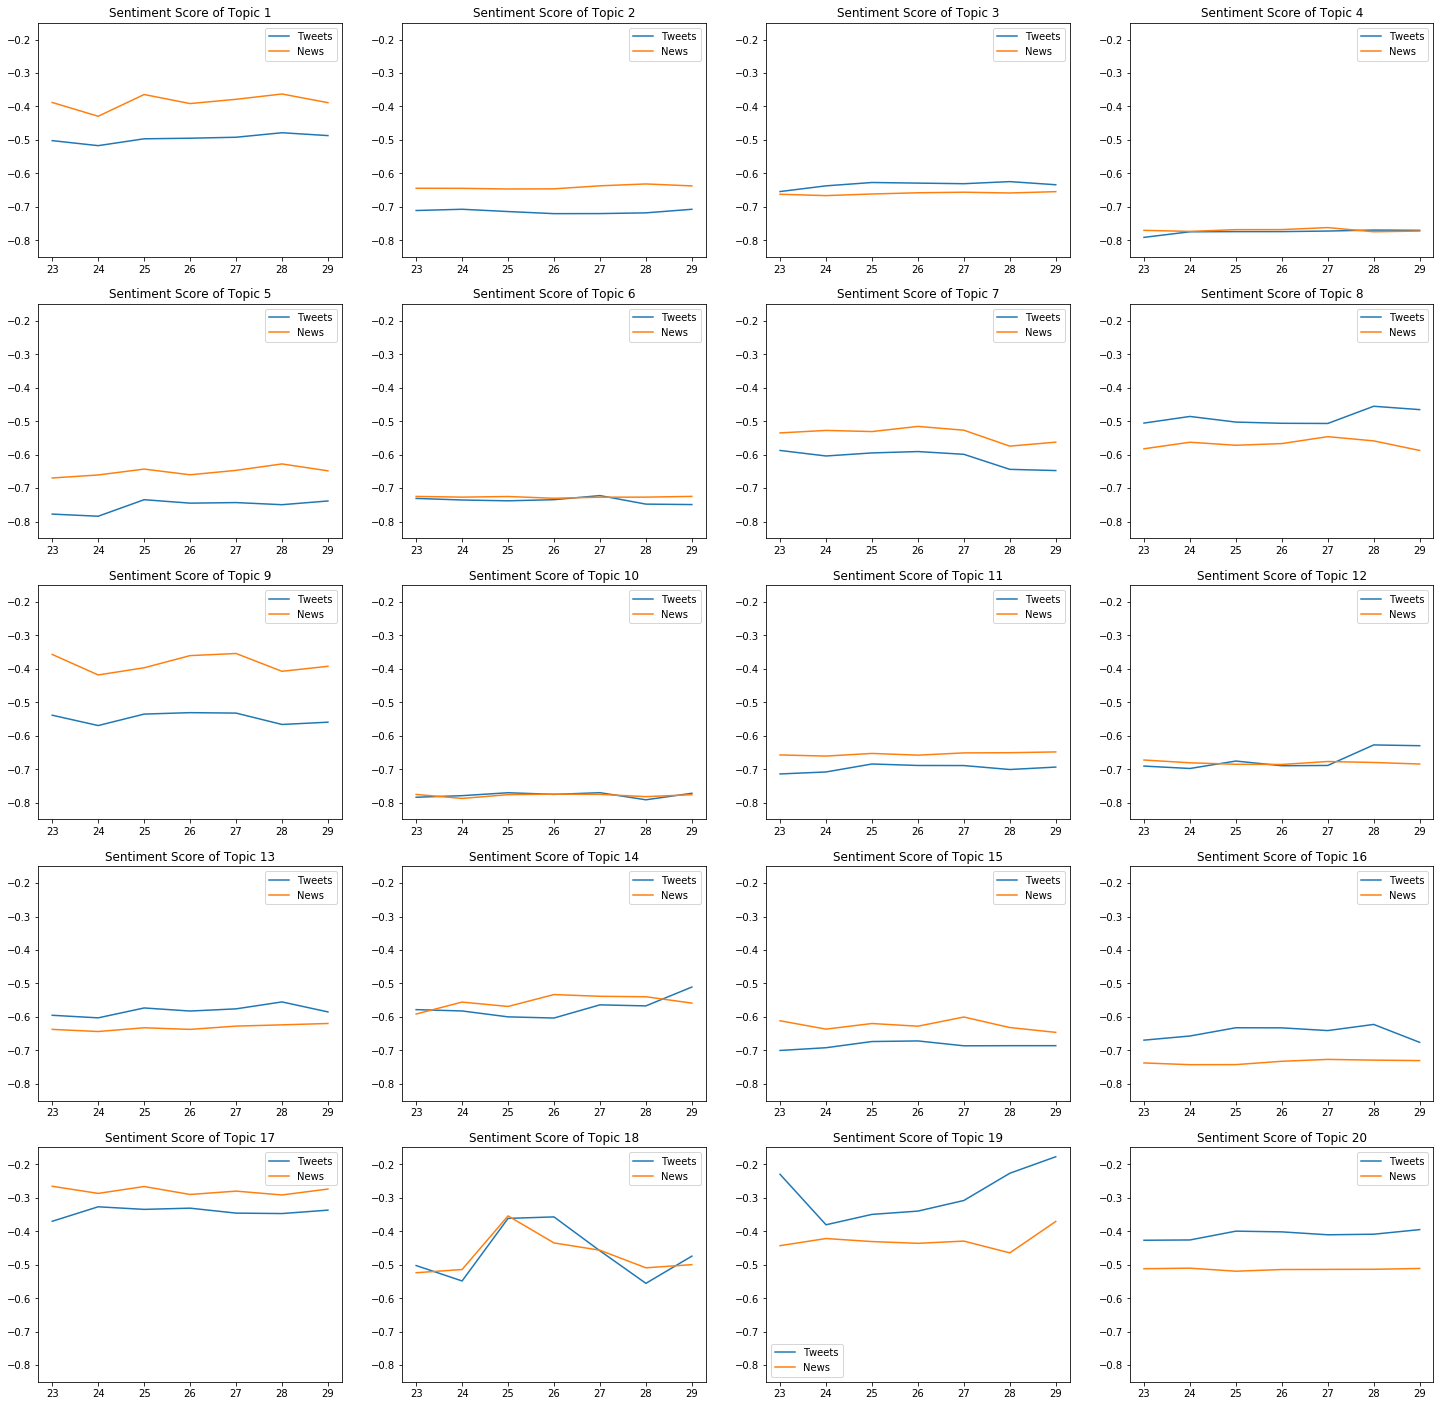

In [689]:
def multi_subplot_sent_score(w=15,h=12):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            pd.Series(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot(ylim=(-0.85,-0.15))
            pd.Series(df_topic_sent_news.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot(ylim=(-0.85,-0.15))
            plt.legend(['Tweets','News'],loc='best')
            plt.xticks(range(7),range(23,30),rotation=0)
#             pic.set_ylim([-0.85,-0.2]) #若适用plt.plot(xx)则不能适用该属性
            plt.title('Sentiment Score of Topic '+ str(t))
            t += 1
multi_subplot_sent_score(w=25,h=25)